In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#import the data
train = pd.read_csv('./titanic/train.csv')

### Data Preprocessing

#### Check for missing values

<AxesSubplot:>

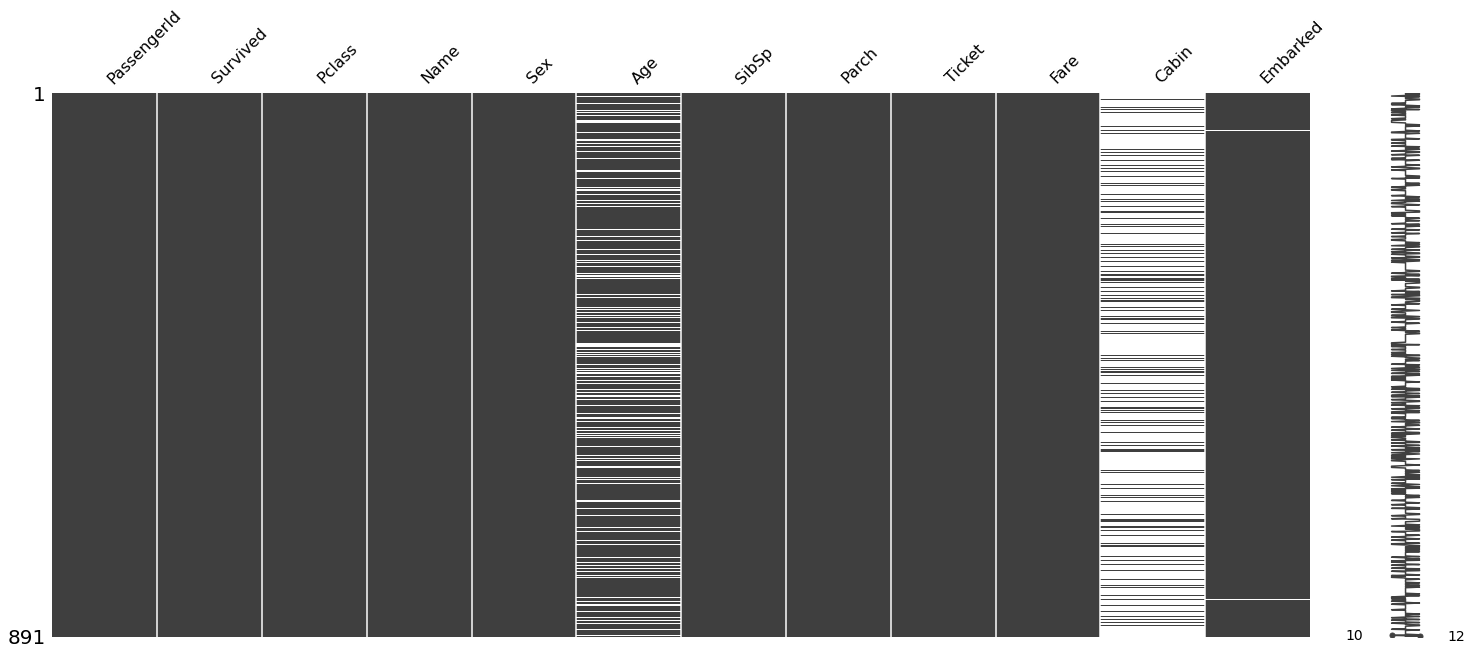

In [3]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

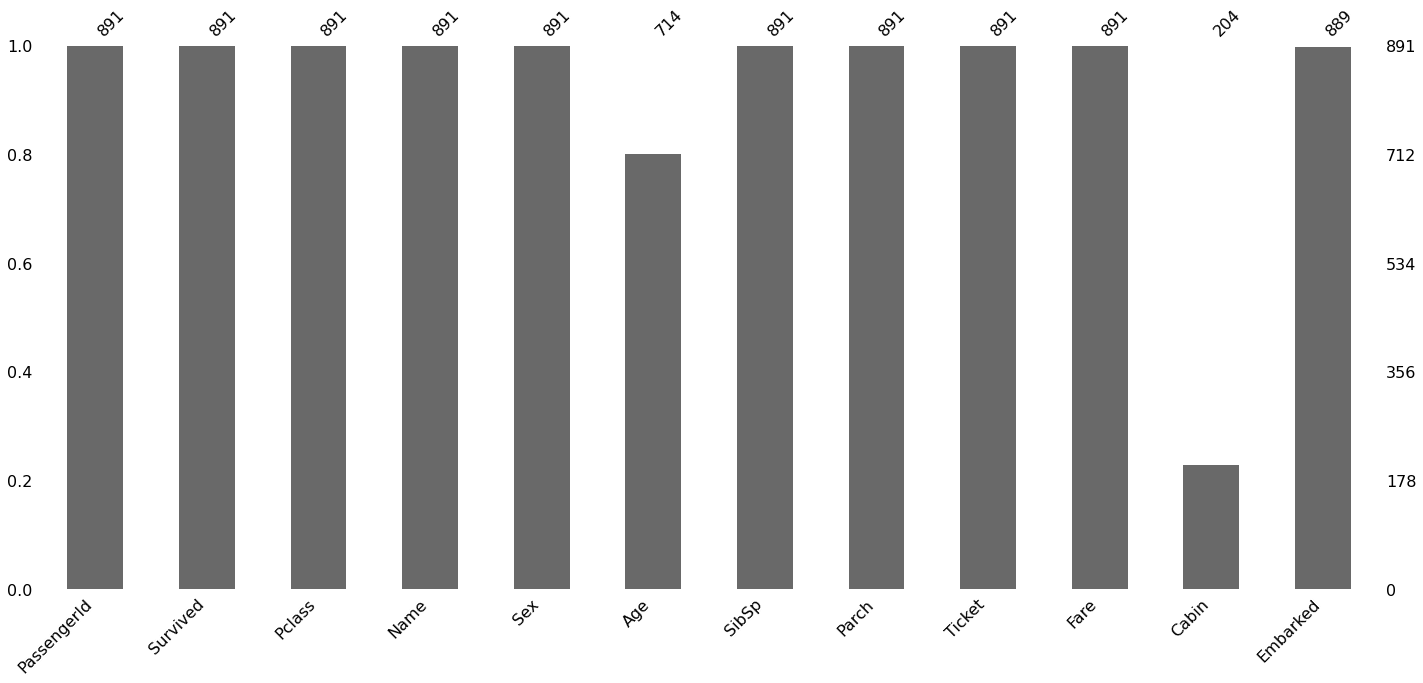

In [4]:
msno.bar(train)

In [5]:
#Delete 'Cabin' column as it has a a lot of missing values
del train['Cabin']

In [6]:
#analysis of the missing persons
train[(train['Age'].isnull()) & train['Survived'] == 1]
print(f"Persons with Missing Age that survived {len(train[(train['Age'].isnull()) & train['Survived'] == 1])}")


train[(train['Age'].isnull()) & train['Survived'] == 0]
print(f"Persons with Missing Age that didn\'t survived {len(train[(train['Age'].isnull()) & (train['Survived'] == 0)])}")

Persons with Missing Age that survived 52
Persons with Missing Age that didn't survived 125


In [7]:
#replace the misssing values of 'Age' column with the median age
# train['Age'] = train['Age'].fillna(train['Age'].median())

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#repalce the missing values 'Embarked' column with the highest occuring frequency.
train['Embarked'] = train['Embarked'].fillna('S') 

### Explanatory Data Analysis

In [10]:
 train.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

#### Column : Survived
<br>

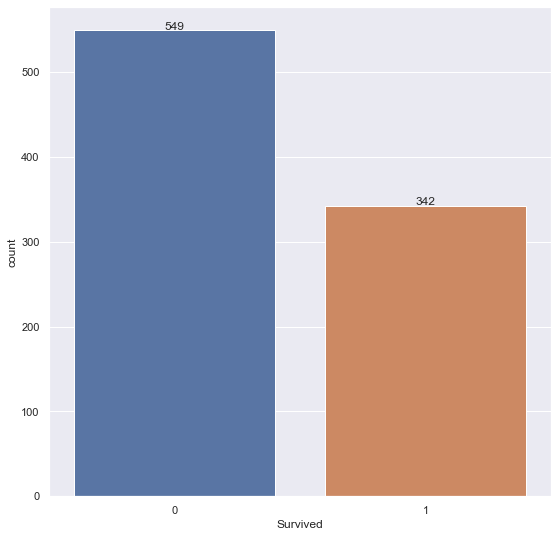

In [11]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (9,9))
sns.countplot(x="Survived", data=train)
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

In [12]:
fig = px.pie(train,values="Survived",names="Sex",template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Sex composition of Survive Passengers',
           layout_showlegend=False)

#### <li>Only about 38.38 % (342) of the total passengers (891) survived.

#### Column : Pclass
<br>

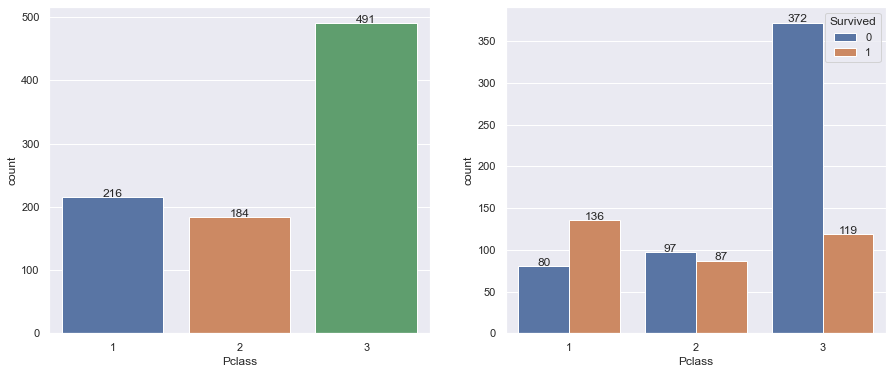

In [13]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass", data=train,ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 62.968 % (136) of the 1st classs passengers (216) survived.
#### <li>Only 24.23% (119) of the 3rd classs passengers (491) survived.

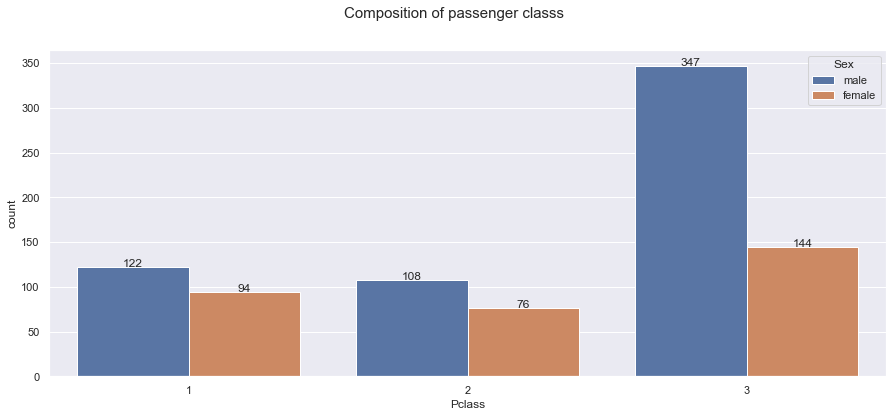

In [14]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x="Pclass",hue = 'Sex',data=train)
fig.suptitle('Composition of passenger classs', fontsize =15)
#annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs Ticket class ')

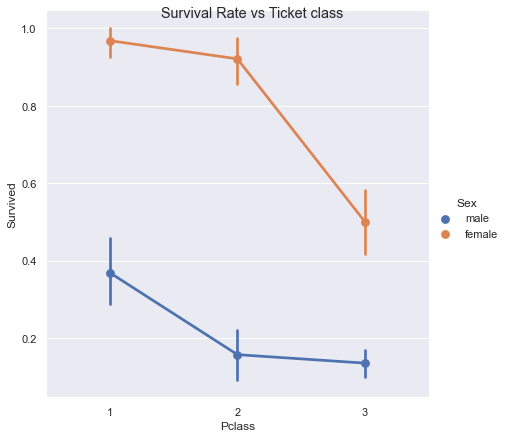

In [15]:
ax = sns.catplot(x ='Pclass', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs Ticket class ')

Text(0.5, 0.98, 'Sex Composition of passenger classs')

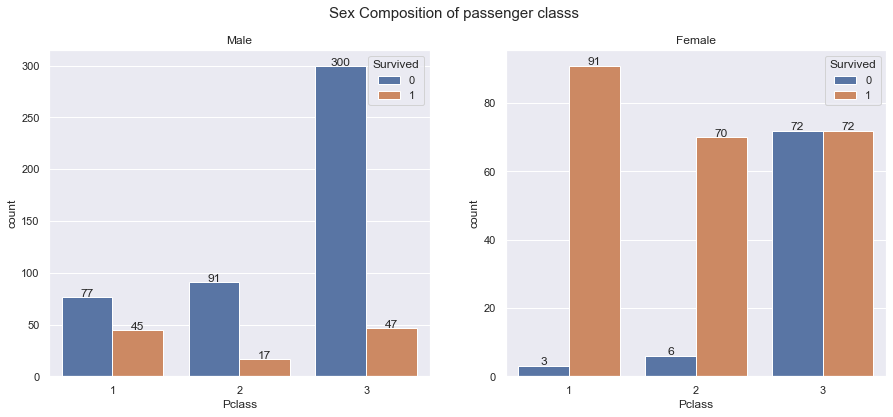

In [16]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass",hue = 'Survived',data=train[train['Sex'] == 'male'],ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train[train['Sex'] == 'female'],ax = ax[1])
ax[0].set_title('Male')
ax[1].set_title('Female')
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")
fig.suptitle('Sex Composition of passenger classs', fontsize =15)        

#### <li>About 96.68 % (91) of the female 1st classs passengers (94) survived.
#### <li>Only 13.54% (47) of the male 3rd classs passengers (347) survive

Text(0.5, 0.98, 'Age distribution of passenger classs')

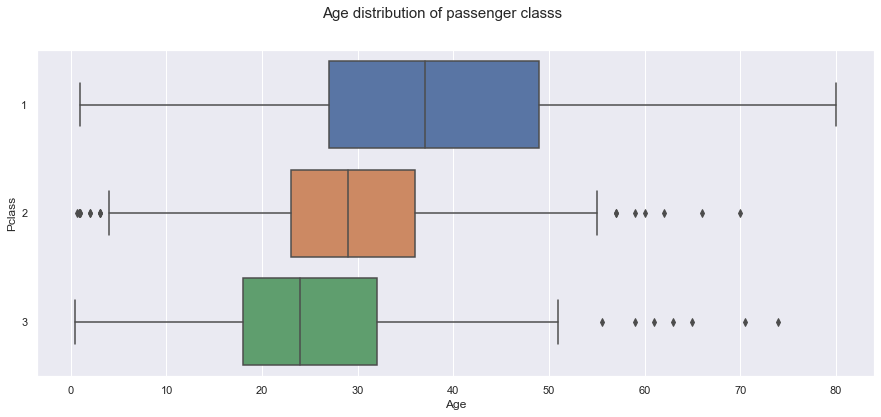

In [17]:
fig,ax = plt.subplots(figsize = (15,6))
ax = sns.boxplot(y="Pclass", x="Age",orient="h", data=train)
fig.suptitle('Age distribution of passenger classs', fontsize=15)

In [18]:
fig = px.pie(train,
             values="Fare",
             names="Pclass",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Percentage of Fare collected through Pclass',
           layout_showlegend=False)
fig.show()


In [19]:
print('Total Passengers by Pclass')
print(train['Pclass'].value_counts())

Total Passengers by Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [20]:
print('Total Survived Passengers by Pclass')
print(train[train['Survived'] == 1]['Pclass'].value_counts())

Total Survived Passengers by Pclass
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [21]:
print('Percentage of  Survived Passengers by Pclass')
train[train['Survived'] == 1]['Pclass'].value_counts() / train['Pclass'].value_counts()

Percentage of  Survived Passengers by Pclass


1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

#### <li>About 55.1 % (491) of the total passengers (891) booked 3rd class ticket.
#### <li>About 62.96 % (136) of the total 1st classs passengers (184) survived.
#### <li>Only 24.23% (119) of the total 3rd classs passengers (491) survived.    

#### Column : Sex
<br>

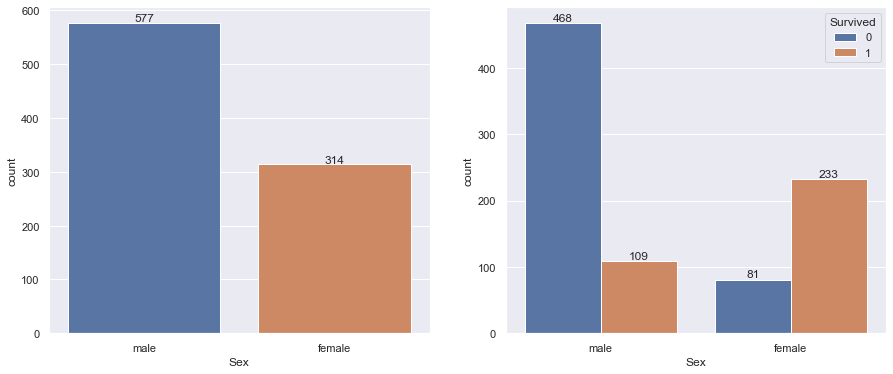

In [22]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Sex", data=train,ax = ax[0])
sns.countplot(x="Sex",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 3,height ,ha="center")

Text(0.5, 0.98, "Distribution of passenger's age")

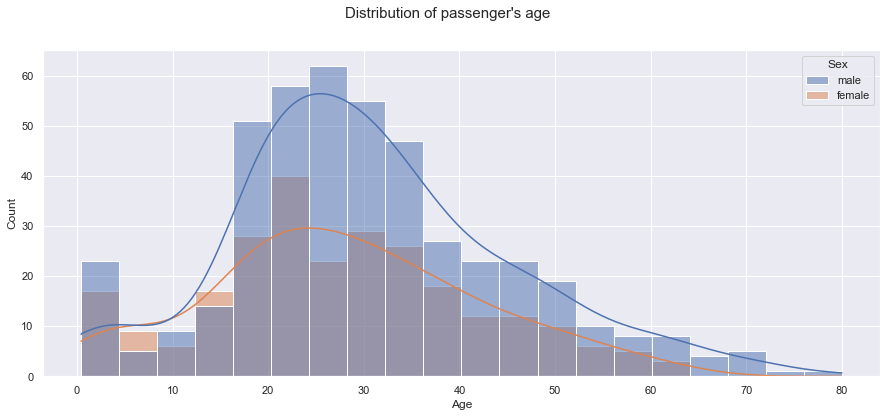

In [23]:
fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train)
fig.suptitle('Distribution of passenger\'s age', fontsize=15)

In [24]:
print('Passengers composition by Sex')
train['Sex'].value_counts()

Passengers composition by Sex


male      577
female    314
Name: Sex, dtype: int64

In [25]:
print('Survived Passengers composition by Sex')
train[train['Survived'] == 1]['Sex'].value_counts()

Survived Passengers composition by Sex


female    233
male      109
Name: Sex, dtype: int64

#### <li>About 74.2 % (233) of the total Female passengers (314) survived.
#### <li>About 18.89 % (109) of the total Male passengers (577) survived.

#### Column : Age
<br>

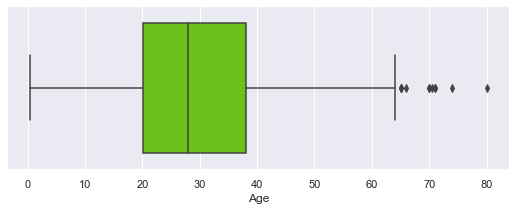

In [26]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Age'],color = '#6edb00')

<AxesSubplot:xlabel='Age', ylabel='Count'>

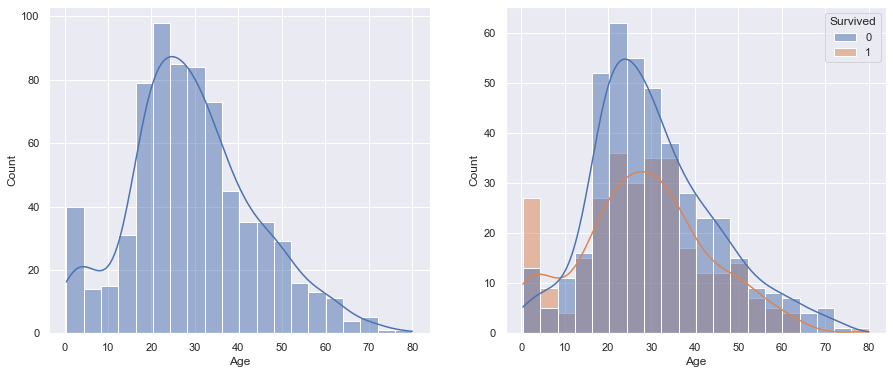

In [27]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Age",kde = True ,data=train,ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train,ax = ax[1])

#### Analysis of minor-passengers

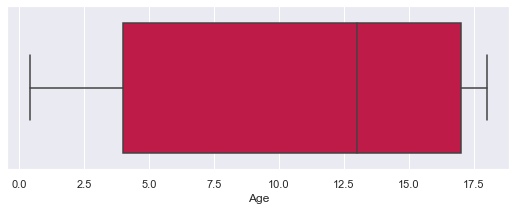

In [28]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x = train[train['Age'] <=18.0]['Age'],color = '#d9003d')

Text(0.5, 0.98, 'Age distribution of minors')

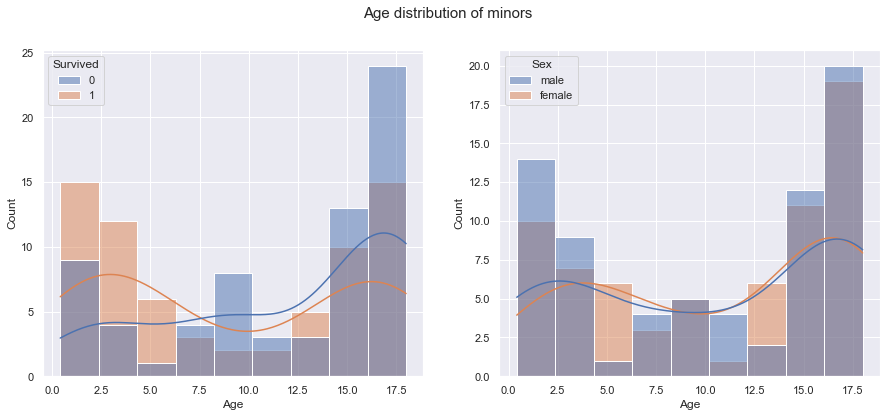

In [29]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Age'] <=18.0],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['Age'] <=18.0],ax = ax[1])
fig.suptitle('Age distribution of minors', fontsize=15)

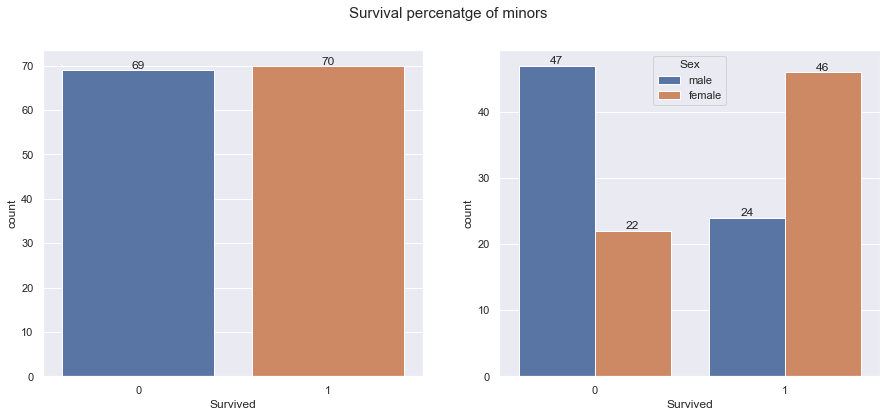

In [30]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],hue = 'Sex',ax = ax[1])
fig.suptitle('Survival percenatge of minors', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [31]:
print('Total minors Sex-wise')
train[train['Age'] <=18.0]['Sex'].value_counts()

Total minors Sex-wise


male      71
female    68
Name: Sex, dtype: int64

#### <li>About 15.60% (139) of the total passengers (891) were minors. 
#### <li>About 50.35% (70) of the minor passengers (139) survived. 
#### <li>About 67.64% (46) of the female-minor passengers (68) survived.

#### Column : Name
<br>

In [32]:
#extract the initial title of the name
train['Name_initial'] = train['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

Text(0.5, 0.98, 'Count of Initial name of Passengers')

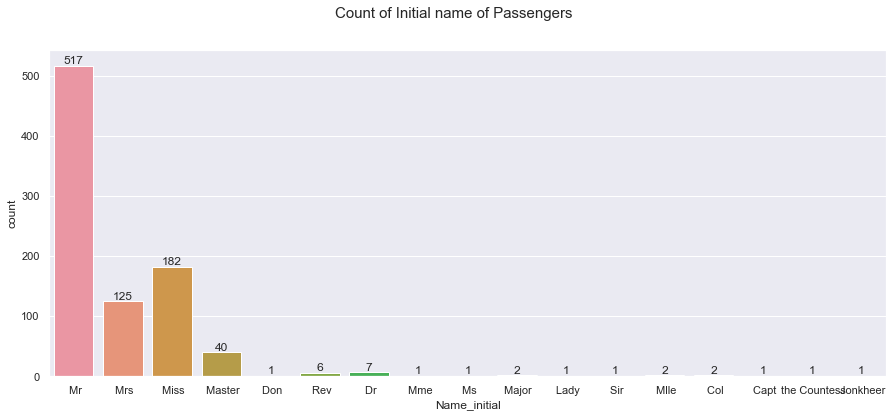

In [33]:
fig,ax = plt.subplots(figsize = (15,6))
ax = sns.countplot(x = 'Name_initial',data = train)
#annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,height ,ha="center")
fig.suptitle('Count of Initial name of Passengers', fontsize=15)    

Text(0.5, 0.98, 'Compositon of the top 6 occuring initial name')

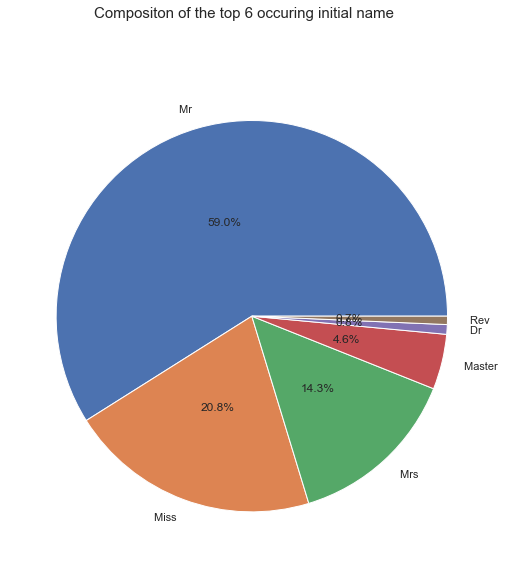

In [34]:
fig,ax = plt.subplots(figsize = (9,9))
ax = plt.pie(x=train['Name_initial'].value_counts().head(6), autopct="%.1f%%", labels = train['Name_initial'].value_counts().head(6).index,pctdistance=0.5)
fig.suptitle('Compositon of the top 6 occuring initial name', fontsize=15)

#### Column : SibSp (Number of Siblings / Spouses Aboard)
<br>

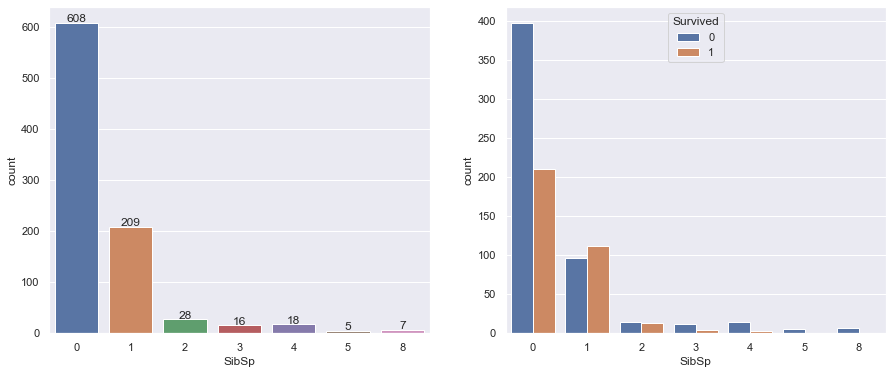

In [35]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="SibSp", data=train,ax = ax[0])
sns.countplot(x="SibSp",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs sibling / spouce abord ')

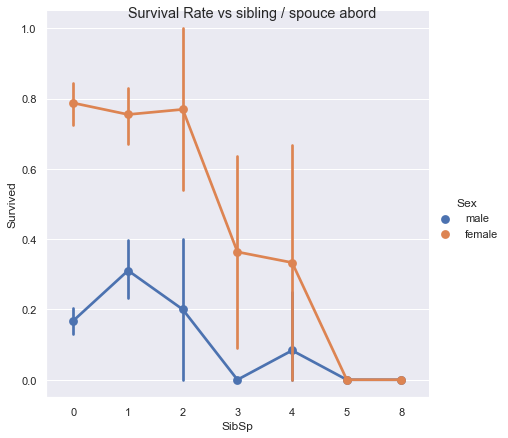

In [36]:
ax = sns.catplot(x ='SibSp', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs sibling / spouce abord ')

##### Passengers travelling with one or more siblings / spouce.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with one or more siblings / spouce')

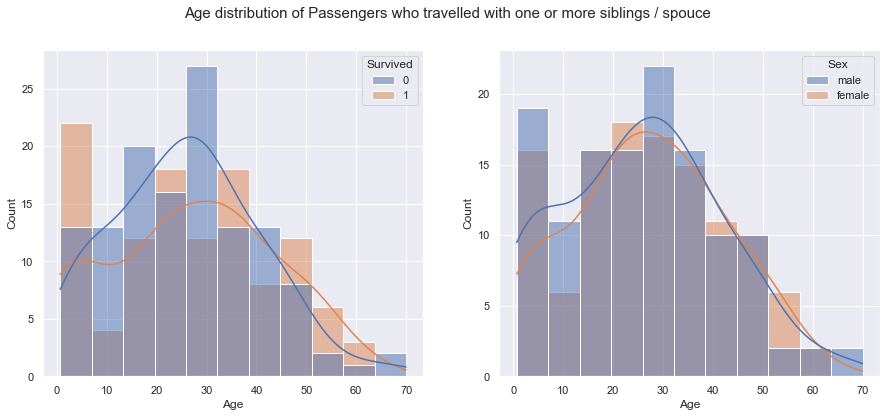

In [37]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['SibSp'] >= 1],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['SibSp'] >= 1],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with one or more siblings / spouce', fontsize=15)

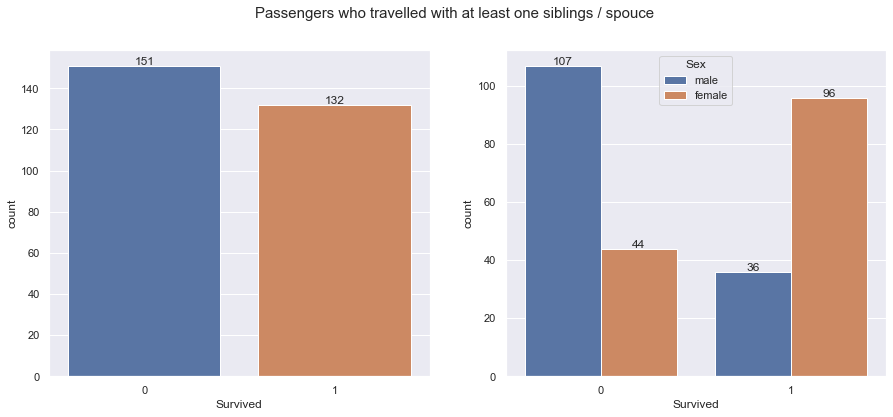

In [38]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one siblings / spouce', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [39]:
print('Gender distribution of Passengers who travelled with one or more siblings/spouce')
train[(train['SibSp'] >= 1)]['Sex'].value_counts()

Gender distribution of Passengers who travelled with one or more siblings/spouce


male      143
female    140
Name: Sex, dtype: int64

#### <li>About 46.64% (132) of the total passengers (283) survived who travelled with one or more siblings / spouce. 
#### <li>About 44.58% (140) of the total female-passengers (314) travelled with one or more siblings / spouce. 
#### <li>About 68.57% (96) of the total female-passengers (140) survived who travelled with one or more siblings / spouce.
#### <li>Only 25.17% (36) of the total male-passengers (143) survived who travelled with one or more siblings / spouce.   

##### Passengers travelling with no siblings/spouce

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with no siblings / spouce')

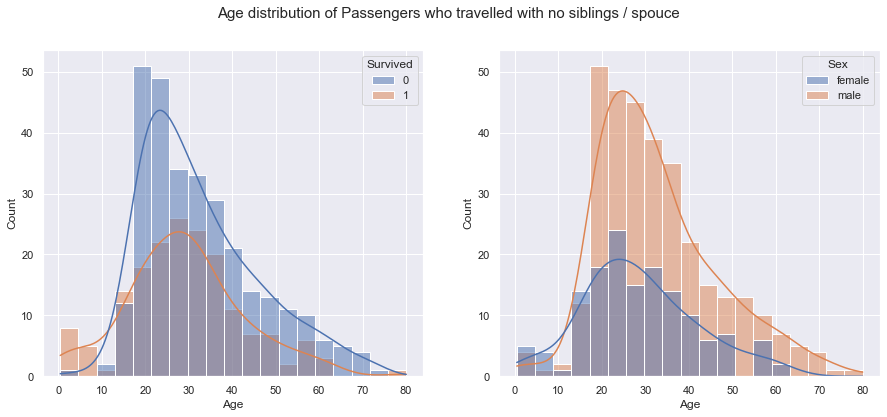

In [40]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['SibSp'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['SibSp'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with no siblings / spouce', fontsize=15)

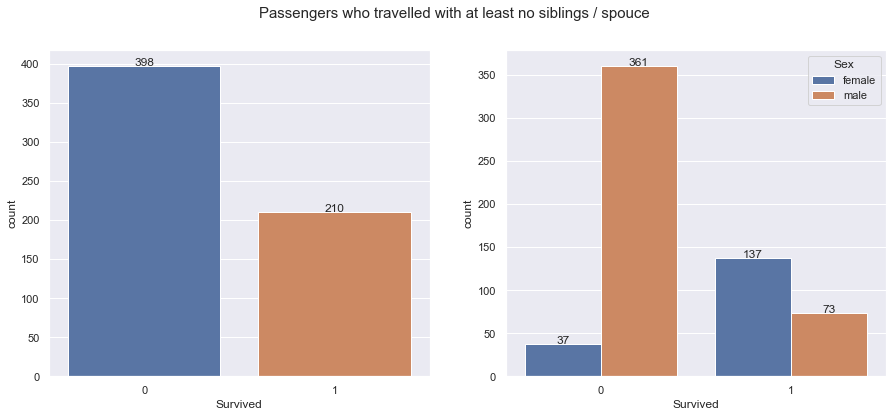

In [41]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['SibSp'] == 0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['SibSp'] == 0],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least no siblings / spouce', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [42]:
print('Gender distribution of Passengers who travelled with no siblings')
train[(train['SibSp'] == 0)]['Sex'].value_counts()

Gender distribution of Passengers who travelled with no siblings


male      434
female    174
Name: Sex, dtype: int64

#### <li>Only 34.53% (210) of passengers (610) survived who travelled with no siblings.
#### <li>About 55.51% (174) of the total female-passengers (314) survived travelled with no siblings.     
#### <li>About 78.73% (137) of female-passengers (174) survived who travelled with no siblings.
#### <li>Only 16.62% (73) of male-passengers (434) survived who travelled with no siblings.      

#### Column : Parch (Number of Parents/Children Aboard)
<br>

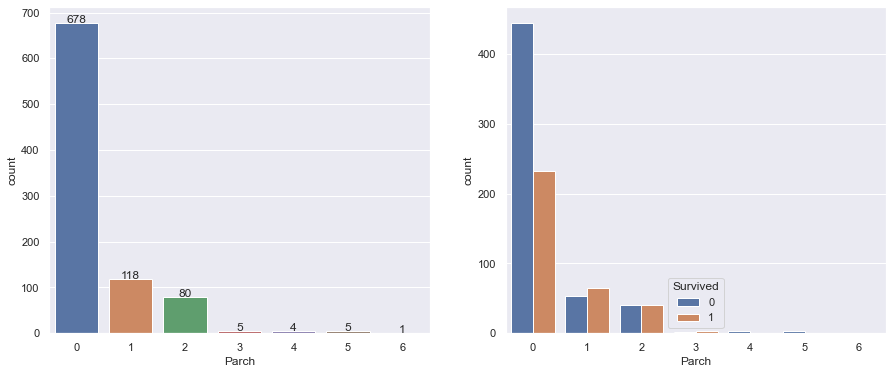

In [43]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
ax[0] = sns.countplot(x="Parch", data=train,ax = ax[0])
ax[1] = sns.countplot(x="Parch",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(1):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs Parent / child abord ')

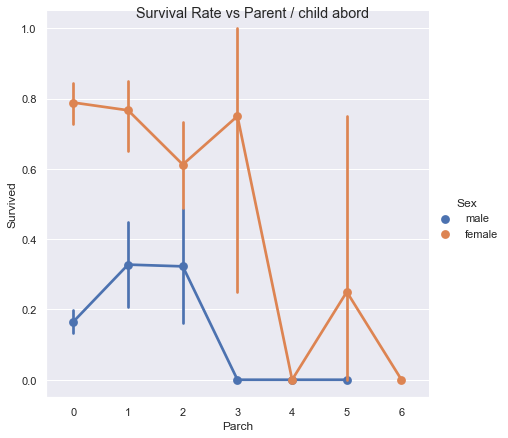

In [44]:
ax = sns.catplot(x ='Parch', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs Parent / child abord ')

##### Passengers travelling with one or more parents / children.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with one or more siblings / spouce')

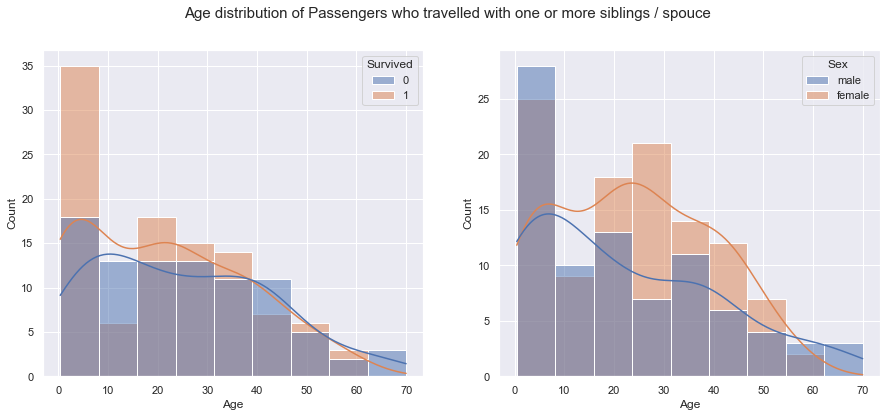

In [45]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Parch'] >= 1],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['Parch'] >= 1],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with one or more siblings / spouce', fontsize=15)

In [46]:
print('Age description of passengers who travelled with one or more parents / children')
train[train['Parch'] >= 1]['Age'].describe()

Age description of passengers who travelled with one or more parents / children


count    193.000000
mean      23.006062
std       17.145160
min        0.420000
25%        7.000000
50%       22.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

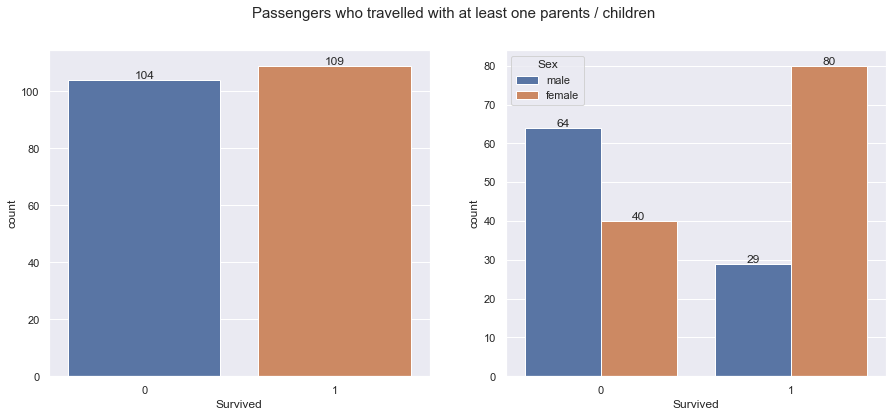

In [47]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one parents / children', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 51.17% (109) of the total passengers (213) survived who travelled with one or more parents / children. 
#### <li>About 38.21% (120) of the total female-passengers (314) survived travelled with one or more parents / children. 
#### <li>About 66.66% (80) of the total female-passengers (120) survived who travelled with one or more parents / children.
#### <li>About 38.18% (29) of the total male-passengers (93) survived who travelled with one or more parents / children. 

##### Passengers travelling with no parent  / child.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with no parent / child')

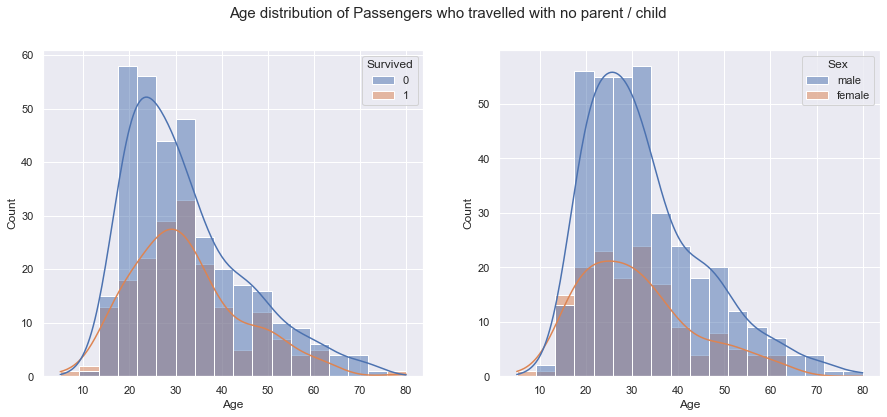

In [48]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['Parch'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['Parch'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with no parent / child', fontsize=15)

In [49]:
print('Age description of passengers who travelled with no parent / child')
train[train['Parch'] == 0]['Age'].describe()

Age description of passengers who travelled with no parent / child


count    521.000000
mean      32.178503
std       12.570448
min        5.000000
25%       22.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

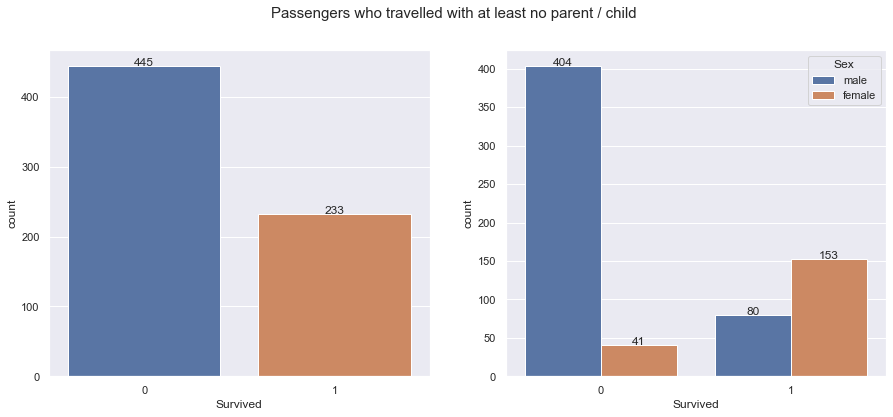

In [50]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Parch'] == 0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Parch'] == 0],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least no parent / child', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 34.36% (109) of the total passengers (678) survived who travelled with one or more parent / child. 
#### <li>About 48.72% (153) of the total female-passengers (314) survived travelled with one or more parent / child. 
 

##### Passengers travelling without family (without parnent / child or sibling / spouce)

Text(0.5, 0.98, 'Age distribution of Passengers who travelled without family')

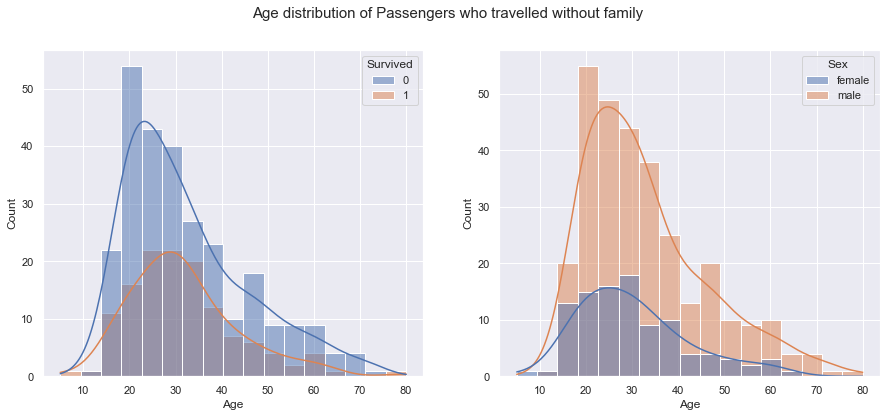

In [51]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled without family', fontsize=15)

In [52]:
print('Age description of passengers who travelled without family')
train[(train['Parch'] == 0) & (train['SibSp'] == 0)]['Age'].describe()

Age description of passengers who travelled without family


count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

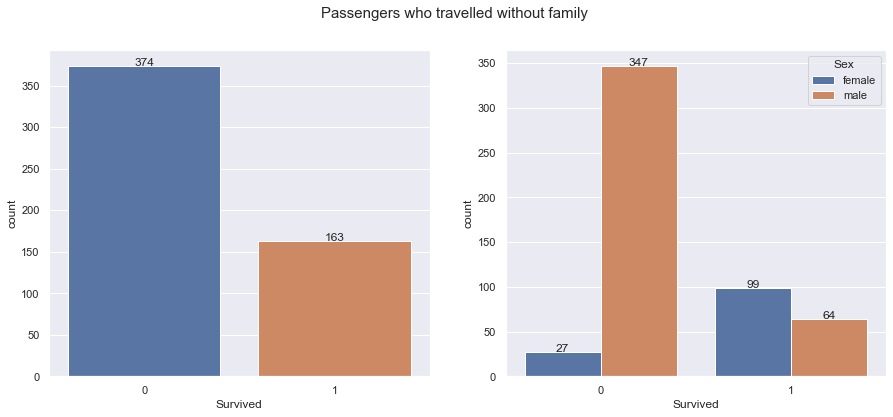

In [53]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[0])
sns.countplot(x="Survived", data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled without family', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 60.26% (537) of the passengers (891) travelled without family.
#### <li>About 84.42% (347) of the male passengers (411) who travelled without family couldn\'t survive

#### Column: Fare
<br>

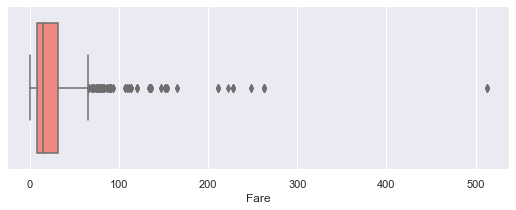

In [54]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Fare'],color = '#ff7a70')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

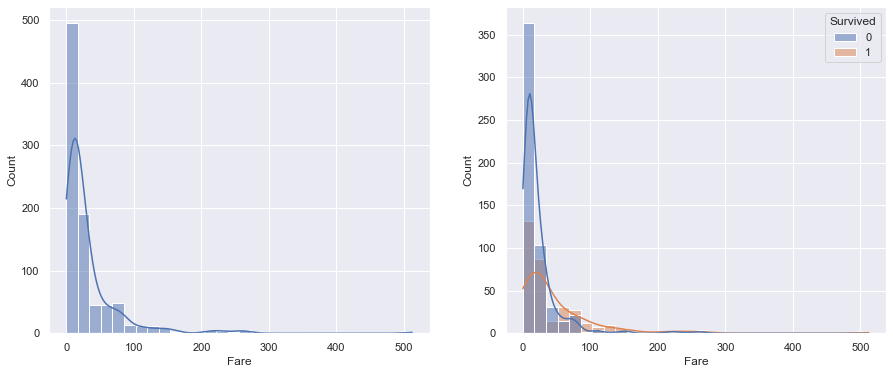

In [55]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True, data=train,ax = ax[0])
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data=train,ax = ax[1])

##### Fare Vs Passengers class

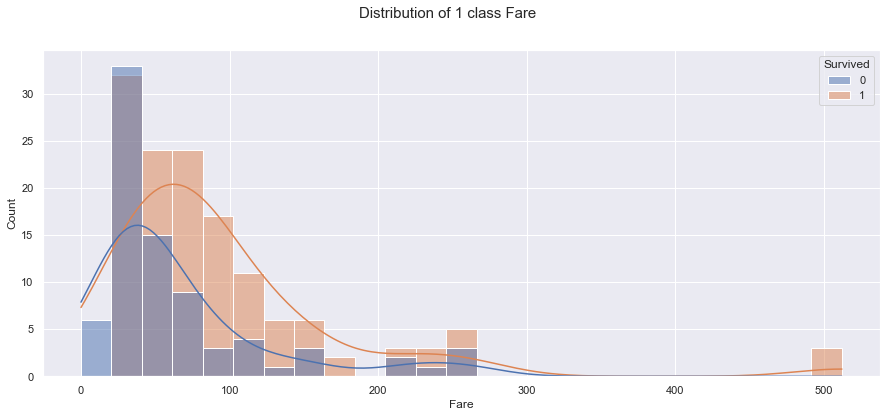

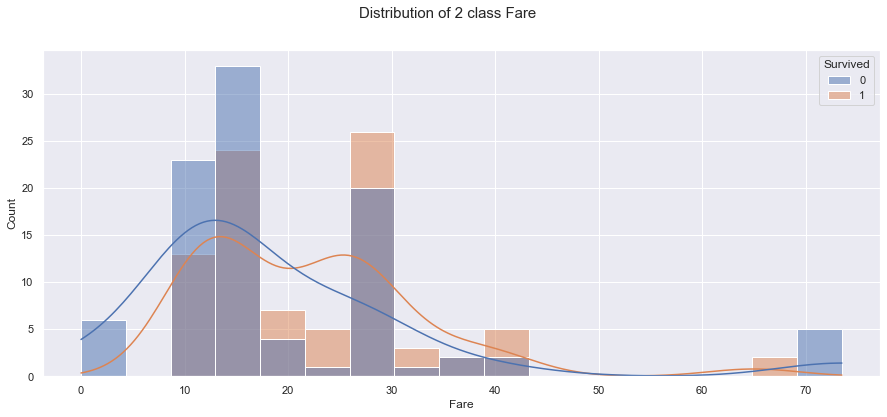

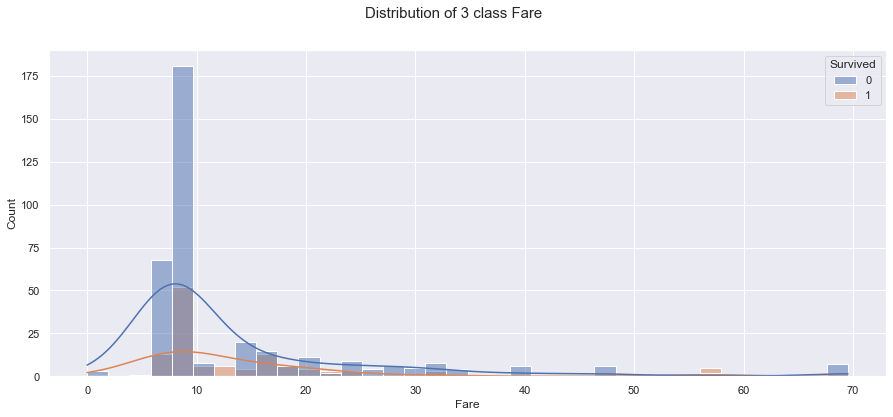

In [56]:
for i in np.arange(1,4):
    fig,ax = plt.subplots(figsize = (15,6))
    sns.histplot(x="Fare",hue = 'Survived',kde = True,data = train[train['Pclass'] == i])
    fig.suptitle(f'Distribution of {i} class Fare', fontsize=15)


##### Analysis of passengers whose fare is more than £ 100

Text(0.5, 0.98, 'Passengers whose Fare is more than £ 100')

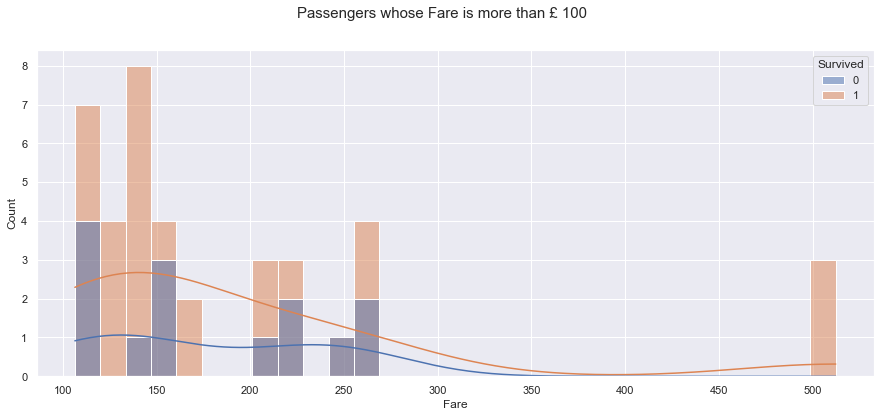

In [57]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data = train[train['Fare'] >= 100 ])
fig.suptitle('Passengers whose Fare is more than £ 100', fontsize=15)

Text(0.5, 0.98, 'Survival of Passengers whose Fare is more than £ 100')

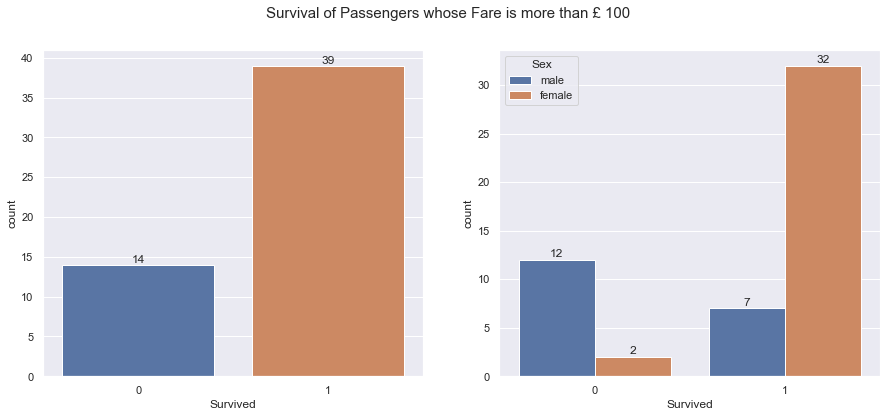

In [58]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
ax[0] = sns.countplot(x="Survived", data = train[train['Fare'] >= 100 ],ax = ax[0])
ax[1] = sns.countplot(x="Survived", data = train[train['Fare'] >= 100 ],hue = 'Sex',ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")
        
fig.suptitle('Survival of Passengers whose Fare is more than £ 100', fontsize=15)        

In [59]:
print('Survived passengers whose ticket costs more than £ 100')
train[train['Fare'] >= 100 ]['Survived'].value_counts()

Survived passengers whose ticket costs more than £ 100


1    39
0    14
Name: Survived, dtype: int64

In [60]:
print('Sex composition survived passengers whose ticket costs more than £ 100')
train[(train['Fare'] >= 100) & train['Survived'] == 1]['Sex'].value_counts()

Sex composition survived passengers whose ticket costs more than £ 100


female    32
male       7
Name: Sex, dtype: int64

#### <li>About 5.94% (53) of the total passenger's (891) fare was more than £ 100. 
#### <li>About 73.58% (39) of those passengers (53) survived. 
#### <li>About 82.05% (32) of those survived (39) were females.

##### Analysis of passengers whose fare is less than £ 50

Text(0.5, 0.98, 'Passengers whose Fare is less than £ 50')

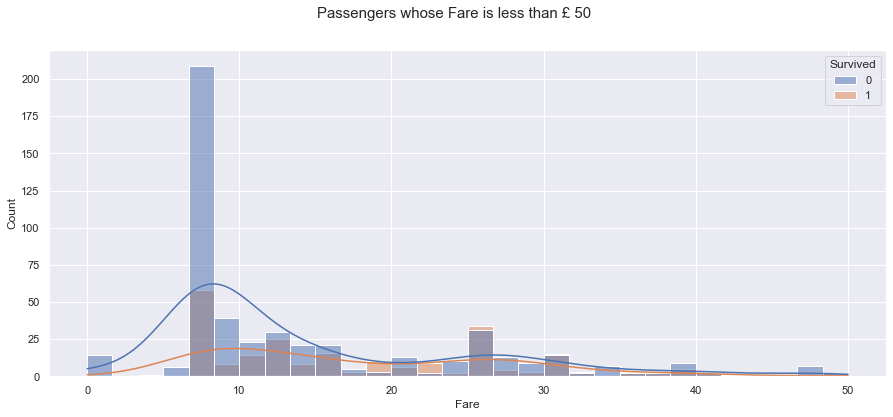

In [61]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data = train[train['Fare'] <= 50 ])
fig.suptitle('Passengers whose Fare is less than £ 50', fontsize=15)

Text(0.5, 0.98, 'Survival of Passengers whose Fare is less than £ 50')

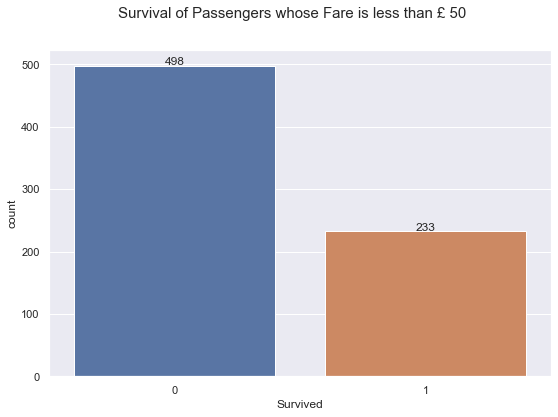

In [62]:
fig,ax = plt.subplots(figsize = (9,6))
ax = sns.countplot(x="Survived", data = train[train['Fare'] <= 50 ])
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
fig.suptitle('Survival of Passengers whose Fare is less than £ 50', fontsize=15)    

#### <li>About 82.04% (731) of the total passenger's (891) fare was less than £ 50. 
#### <li>Only 31.87% (233) of those survived (731) survived.

#### Column : Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
<br>

Text(0.5, 0.98, 'Passengers count')

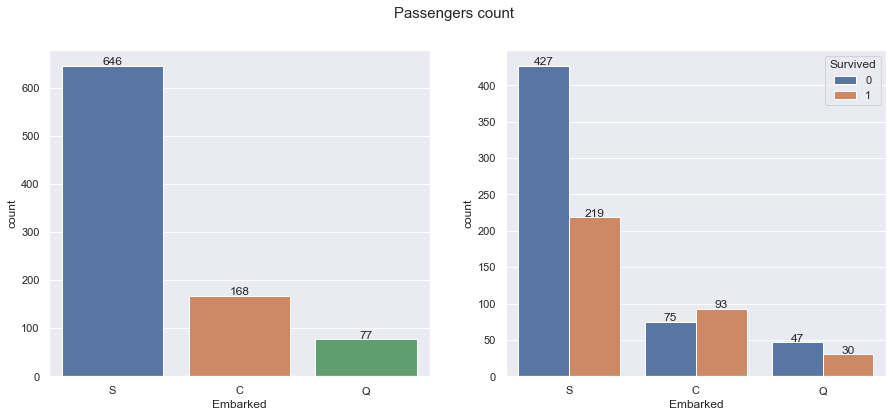

In [63]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Embarked",data=train,ax = ax[0])
sns.countplot(x="Embarked",hue = 'Survived', data=train,ax = ax[1])
#annnotations
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
#add title
fig.suptitle('Passengers count', fontsize=15)   

In [64]:
fig = px.pie(train,
             values="Fare",
             names="Embarked",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Percentage of Fare collected through Embarked',
           layout_showlegend=False)
fig.show()


Text(0.5, 0.98, 'Ticket Class and Sex composition')

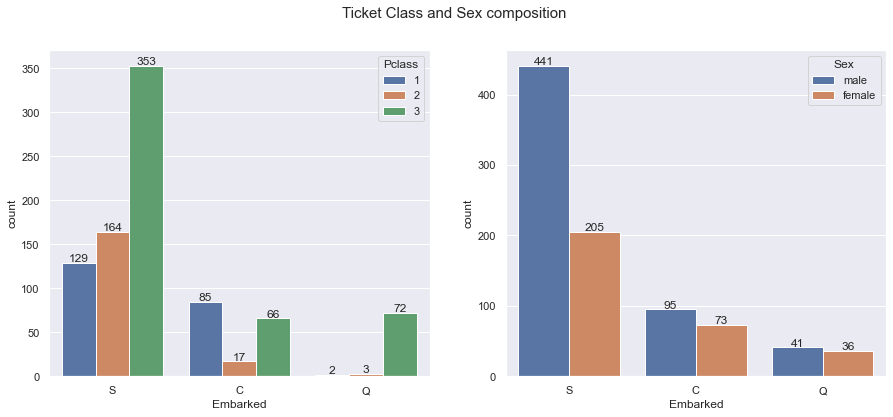

In [65]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Embarked",hue = 'Pclass',data=train,ax = ax[0])
sns.countplot(x="Embarked",hue = 'Sex', data=train,ax = ax[1])
#annnotations
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
#add title
fig.suptitle('Ticket Class and Sex composition', fontsize=15)

#### Skewness

In [66]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

#### Kurtosis

In [67]:
train.kurt()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

#### IQR (Inter Quartile Range)

In [68]:
for i in train.columns[1:]:
    if train[i].dtype != 'object':
        print(i)
        print('IQR: ',train[i].quantile(.75) - train[i].quantile(.25))
        print('')


Survived
IQR:  1.0

Pclass
IQR:  1.0

Age
IQR:  17.875

SibSp
IQR:  1.0

Parch
IQR:  0.0

Fare
IQR:  23.0896



#### Let's See the Correlation among these attributes

In [69]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

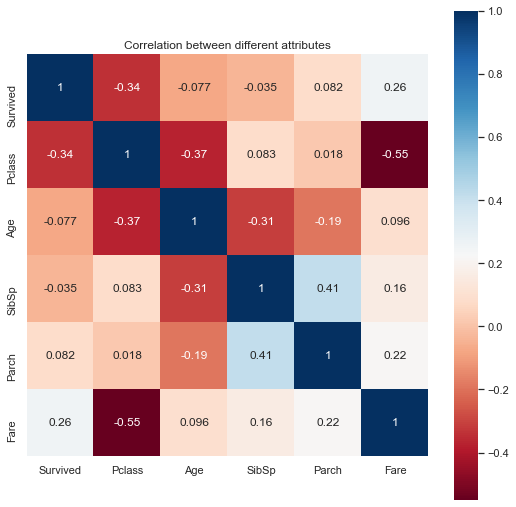

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(train.drop('PassengerId',axis = 1).corr(), vmax=1, square=True,annot=True,cmap='RdBu')
plt.title('Correlation between different attributes')
plt.show()

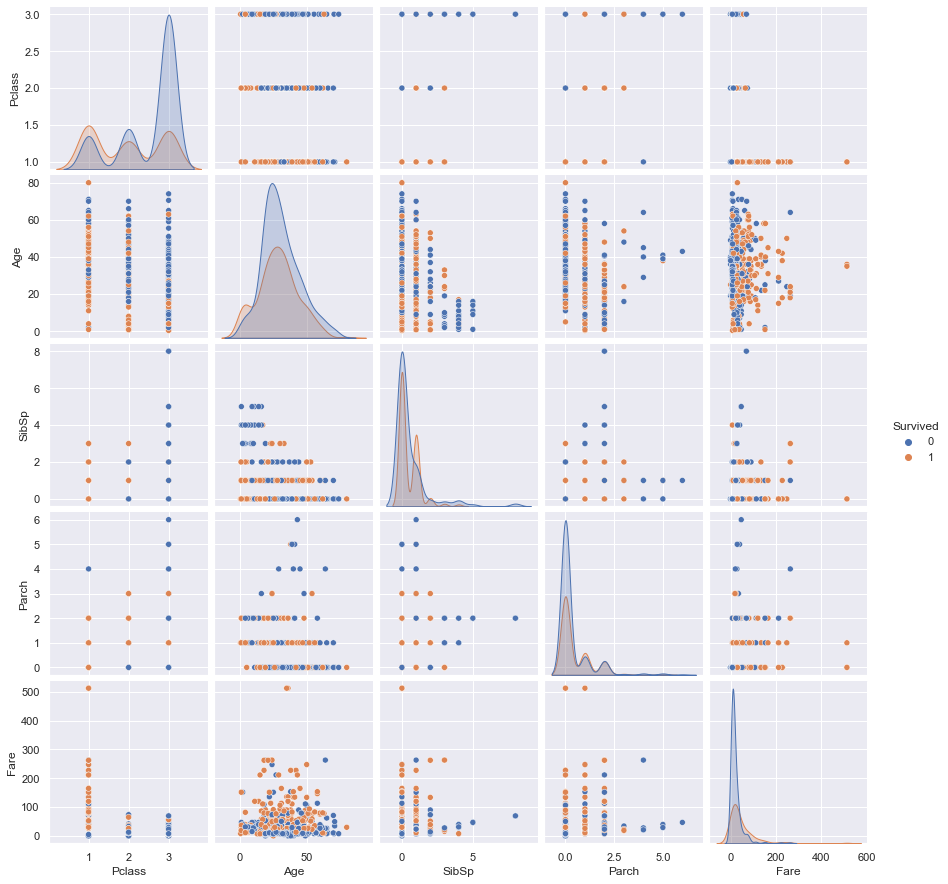

In [71]:
sns.pairplot(train.drop('PassengerId',axis = 1), hue="Survived")

In [72]:
#make a copy for web dev project
train_copy = train.copy()

In [73]:
#repalce 
train_copy['Parch'] =  np.where(train_copy['Parch']!=0, 1,0)
train_copy['SibSp'] =  np.where(train_copy['SibSp']!=0, 1,0)

In [74]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
train[train['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [76]:
titanic_stats = pd.crosstab(index=train_copy['Survived'],
            columns = [train_copy['Sex'],train_copy['Pclass'],train_copy['Parch'],train_copy['SibSp']])

In [77]:
titanic_stats['male']

Pclass     1             2              3           
Parch      0      1      0      1       0      1    
SibSp      0   1  0  1   0   1  0  1    0   1  0   1
Survived                                            
0         50  13  9  5  65  16  2  8  232  28  3  37
1         25  11  4  5   7   1  2  7   32   4  3   8

In [78]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_initial'],
      dtype='object')

#### One-hot encoding

In [79]:
train = train.drop(['PassengerId','Name','Ticket','Name_initial'],axis = 1)
train = pd.get_dummies(train)

#### Impute the missing values

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # just the features
    train['Survived'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((623, 10), (268, 10))

In [211]:
#impute the misssing values with median
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())

#### Scale the data

In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Model Preparation

#### Logistic Regression(Ridge)

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [231]:
logisticRegr = LogisticRegression(penalty='l1', solver='liblinear')
#fit the model
logisticRegr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [232]:
#predictions and score
predictions = logisticRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8171641791044776
The score on the Train-dataset is 0.85553772070626


In [240]:
def plot_condution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

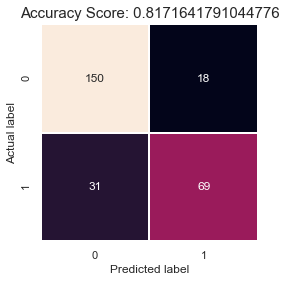

In [241]:
#confusion metrics
plot_condution_metrics(y_test,predictions)

In [243]:
#cross-val score
score = cross_val_score(logisticRegr, X_train, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8010121923165401


#### Logistic Regression(Ridge)


#### Logistic Polynomial Regression

In [224]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

#trasform into polynomial features
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

#standard scale
scaler = StandardScaler()
scaler.fit(X_train_p)
X_train_std = scaler.transform(X_train_p)
X_test_std = scaler.transform(X_test_p)

In [225]:
#fit the model
logisticPolyRegr = LogisticRegression()
logisticPolyRegr.fit(X_train_std, y_train)

#predictions and score
predictions = logisticPolyRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticPolyRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticPolyRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8171641791044776
The score on the Train-dataset is 0.8491171749598716


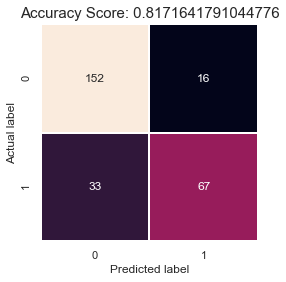

In [226]:
plot_condution_metrics(y_test,predictions)

#### Cross-validation and Hypeer-parameter tuning

In [180]:
poly_degrees = [2,3,4,5,6]
degree_loop_values = []
for degree in poly_degrees:
    poly = PolynomialFeatures(degree = degree)

    #trasform into polynomial features
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    #standard scale
    scaler = StandardScaler()
    scaler.fit(X_train_p)
    X_train_std = scaler.transform(X_train_p)
    X_test_std = scaler.transform(X_test_p)
    
    logisticPolyRegr = LogisticRegression()
    logisticPolyRegr.fit(X_train_std, y_train)

    score = cross_val_score(logisticPolyRegr, X_train, y_train, cv=10,scoring='accuracy')
    degree_loop_values.append([degree,score.mean()])

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-pa

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-pa

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DK BORBORAH\conda\lib\site-pa

In [181]:
degree_loop_values

[[2, 0.8058883768561188],
 [3, 0.8058883768561188],
 [4, 0.8058883768561188],
 [5, 0.8058883768561188],
 [6, 0.8058883768561188]]